# Exploring the Dataset: Initial Overview and Setup

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('flights.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23236 entries, 0 to 23235
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   out_airline                 23236 non-null  object
 1   departure                   23236 non-null  object
 2   out_arrival_airport         23236 non-null  object
 3   out_duration (min)          23236 non-null  int64 
 4   departure_time              23236 non-null  object
 5   out_arrival_time (min)      23236 non-null  object
 6   return_airline              23236 non-null  object
 7   ret_departure               23236 non-null  object
 8   return_arrival_airport      23236 non-null  object
 9   return_duration (min)       23236 non-null  int64 
 10  ret_departure_time          23236 non-null  object
 11  return_arrival_time         23236 non-null  object
 12  flight_price                23236 non-null  int64 
 13  out_stop1_airport           23236 non-null  ob

# Price Distribution and Summary Statistics

In [104]:
price_summary = df['flight_price'].describe()
price_summary

count    23236.000000
mean      1070.114004
std        494.348488
min        265.000000
25%        723.000000
50%       1029.000000
75%       1255.000000
max       4248.000000
Name: flight_price, dtype: float64

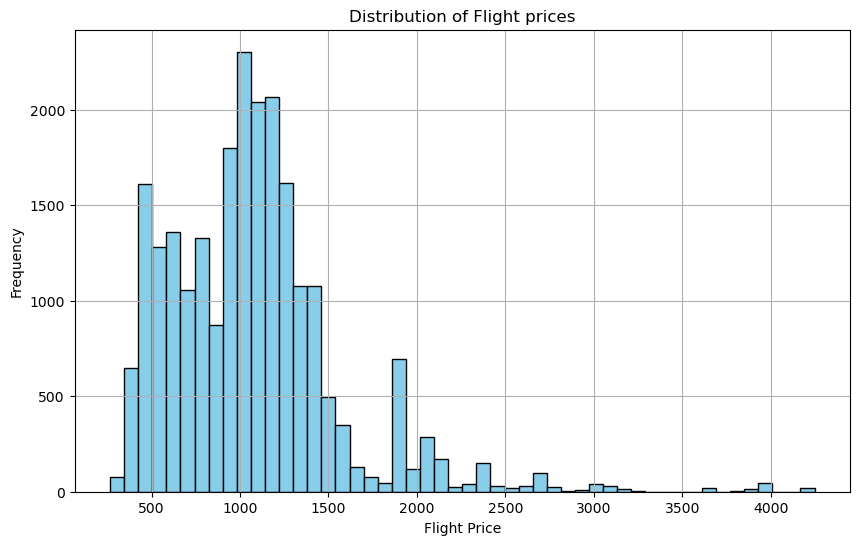

In [105]:
plt.figure(figsize=(10,6))
plt.hist(df['flight_price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight prices')
plt.xlabel('Flight Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Flight Prices by Airline and Season

In [106]:
price_by_airline_season = df.groupby(['out_airline', 'flight_season'])['flight_price'].mean().reset_index()
price_by_airline_season

,out_airline,flight_season,flight_price
0,Aegean Airlines,Autumn,1729.000000
1,Air Arabia,Autumn,624.375610
2,Air Arabia,Spring,564.157895
3,Air Arabia,Summer,628.184874
4,Air Arabia,Winter,561.444444
5,Emirates,Autumn,1155.929787
6,Emirates,Spring,1744.725293
7,Emirates,Summer,1612.445796
8,Emirates,Winter,1279.881702
9,Lufthansa,Autumn,926.216920


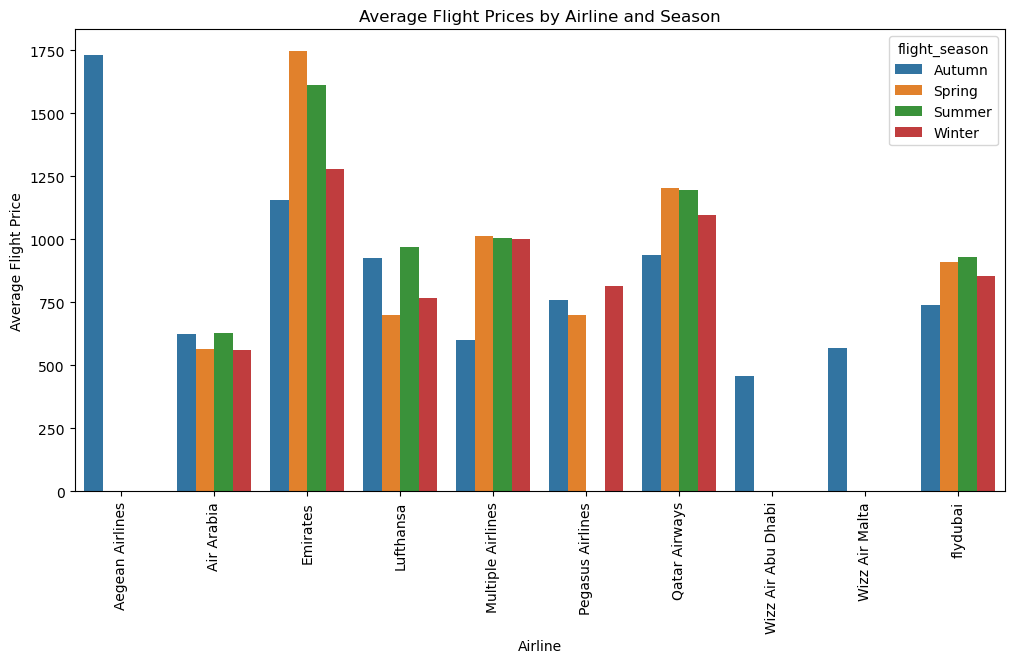

In [107]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='out_airline', y='flight_price', hue='flight_season', data=price_by_airline_season)
plt.title('Average Flight Prices by Airline and Season')
plt.xlabel('Airline')
plt.ylabel('Average Flight Price')
plt.xticks(rotation=90)
plt.show()

In [108]:
pd.DataFrame(price_by_airline_season)
price_by_airline_season.head()
type(price_by_airline_season)

pandas.core.frame.DataFrame

# Impact of Stopovers on Flight Prices and Durations

In [109]:
stopover_analysis = df.groupby(['out_stops_count'])[['flight_price', 'out_duration (min)']].mean().reset_index()
stopover_analysis

,out_stops_count,flight_price,out_duration (min)
0,1,1150.210492,1107.244314
1,2,750.793941,1121.197884
2,3,798.188380,1581.575704


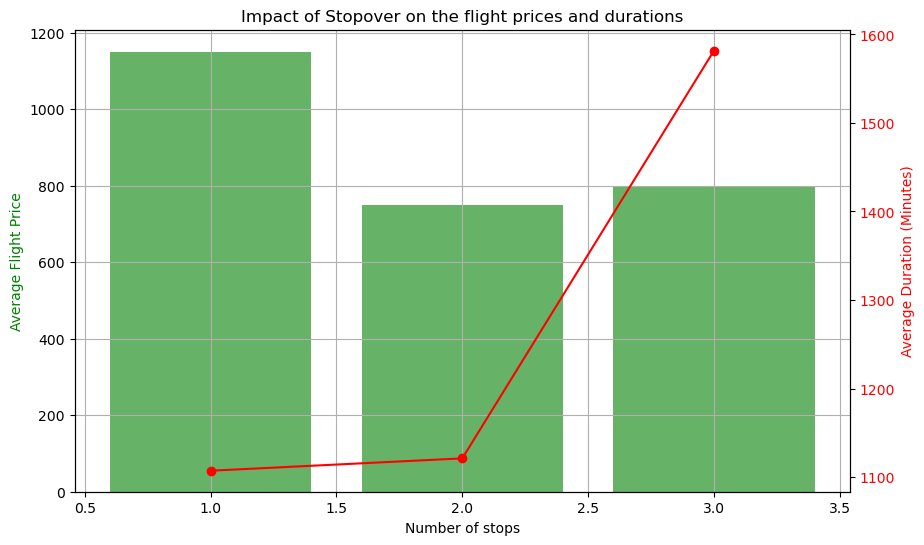

In [110]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Number of stops')
ax1.set_ylabel('Average Flight Price', color='green')
ax1.bar(stopover_analysis['out_stops_count'], stopover_analysis['flight_price'], color='green', alpha=0.6 ,label='Price')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Duration (Minutes)', color='red')
ax2.plot(stopover_analysis['out_stops_count'], stopover_analysis['out_duration (min)'], marker='o', color='red', label='Duration')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Impact of Stopover on the flight prices and durations')
ax1.grid(True)
plt.show()

# Flight Prices and Durations by Routes

In [111]:
route_analysis = df.groupby('flight_route')[['flight_price', 'out_duration (min)']].mean().reset_index()
route_analysis

,flight_route,flight_price,out_duration (min)
0,DMM EVN,906.352665,1128.551173
1,EVN JED,1314.941266,1185.266972
2,EVN MED,1117.817199,1123.446898
3,EVN RUH,1095.109658,1006.717137
4,JED EVN,1130.490895,1186.904847
5,RUH EVN,918.530636,1110.505086


In [112]:
expensive_routes = route_analysis.sort_values(by='flight_price', ascending=False).head(10)
expensive_routes

,flight_route,flight_price,out_duration (min)
1,EVN JED,1314.941266,1185.266972
4,JED EVN,1130.490895,1186.904847
2,EVN MED,1117.817199,1123.446898
3,EVN RUH,1095.109658,1006.717137
5,RUH EVN,918.530636,1110.505086
0,DMM EVN,906.352665,1128.551173


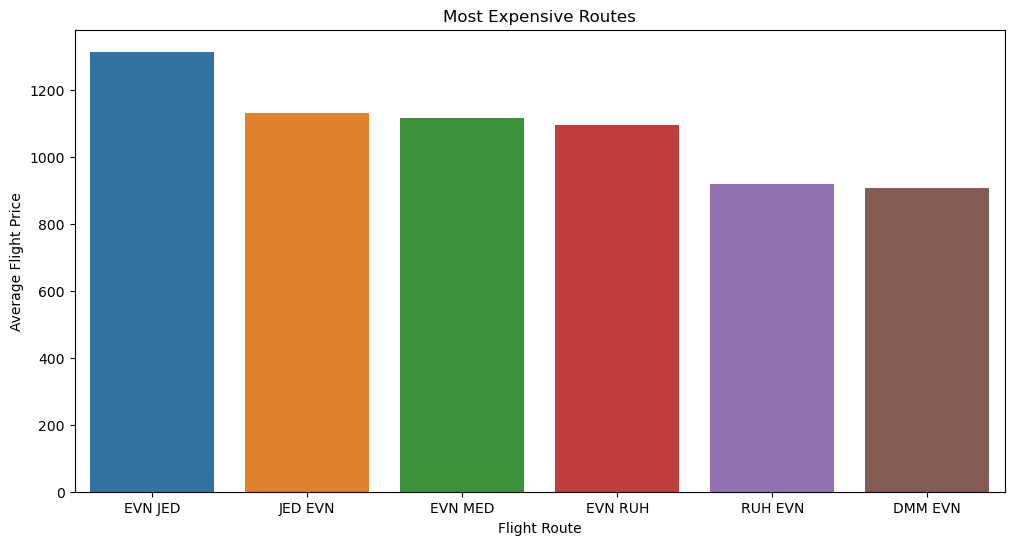

In [113]:
plt.figure(figsize=(12, 6))
sns.barplot(x='flight_route', y='flight_price', data=expensive_routes)
plt.title('Most Expensive Routes')
plt.xlabel('Flight Route')
plt.ylabel('Average Flight Price')
plt.show()

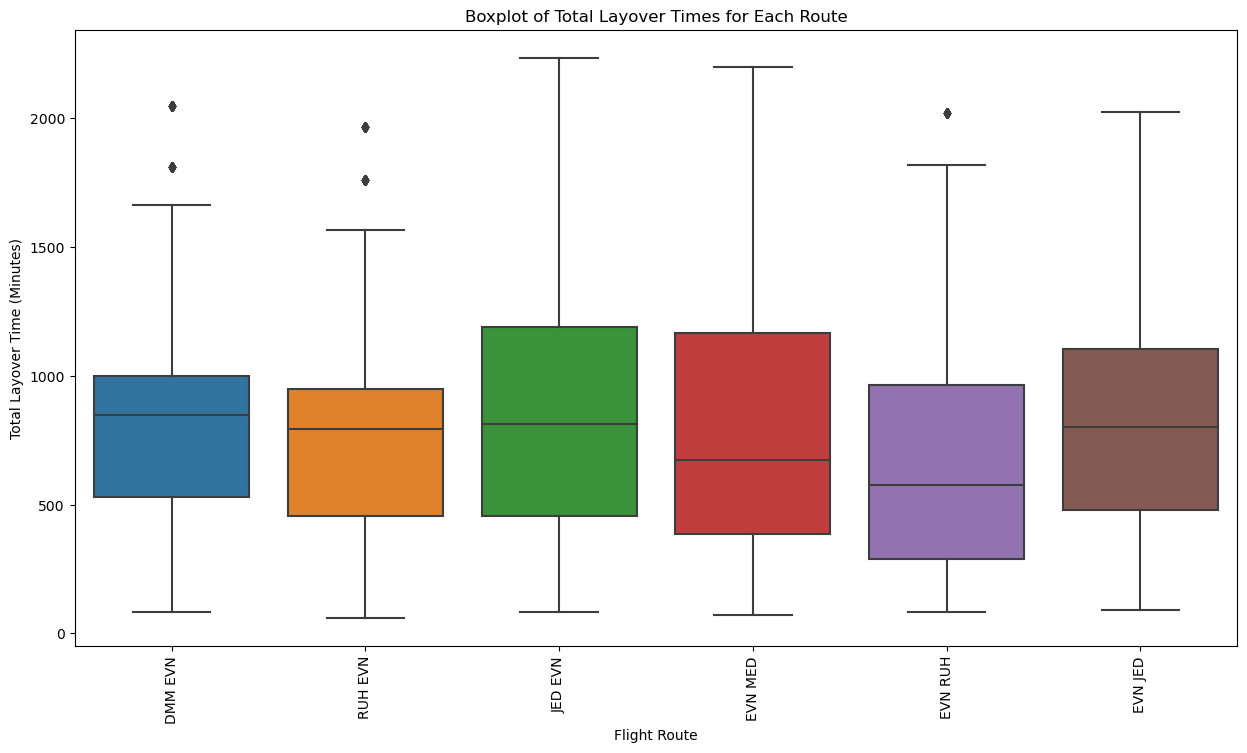

In [114]:
df['total_layover_minutes'] = (
    df['stop1_layover (min)'] + 
    df['outb_stop2_layover (min)'] + 
    df['out_stop3_layover (min)']
)

plt.figure(figsize=(15, 8))
sns.boxplot(x='flight_route', y='total_layover_minutes', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Total Layover Times for Each Route')
plt.xlabel('Flight Route')
plt.ylabel('Total Layover Time (Minutes)')
plt.grid(False)
plt.show()

def filter_route_outliers(df):
    filtered_df = pd.DataFrame()
    grouped_routes = df.groupby('flight_route')
    
    for route, group in grouped_routes:
        Q1 = group['total_layover_minutes'].quantile(0.25)
        Q3 = group['total_layover_minutes'].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        filtered_group = group[(group['total_layover_minutes'] >= lower_bound) & (group['total_layover_minutes'] <= upper_bound)]
        filtered_df = pd.concat([filtered_df, filtered_group])
    
    return filtered_df

filtered_df = filter_route_outliers(df)


# Route-Specific Flight Price vs. Duration Analysis

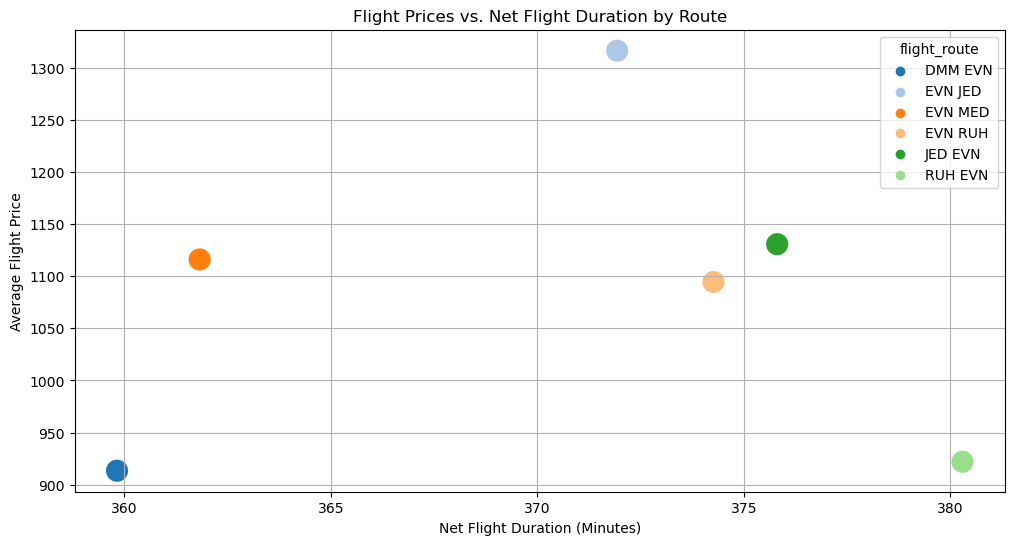

In [ ]:
route_analysis = filtered_df.groupby('flight_route')[['flight_price', 'net_flight_duration_minutes']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='net_flight_duration_minutes', y='flight_price', hue='flight_route', data=route_analysis, palette='tab20', s=300)

plt.title('Flight Prices vs. Net Flight Duration by Route')
plt.xlabel('Net Flight Duration (Minutes)')
plt.ylabel('Average Flight Price')
plt.grid(True)

# Show the plot
plt.show()

#  Investigating Factors That Influence Prices

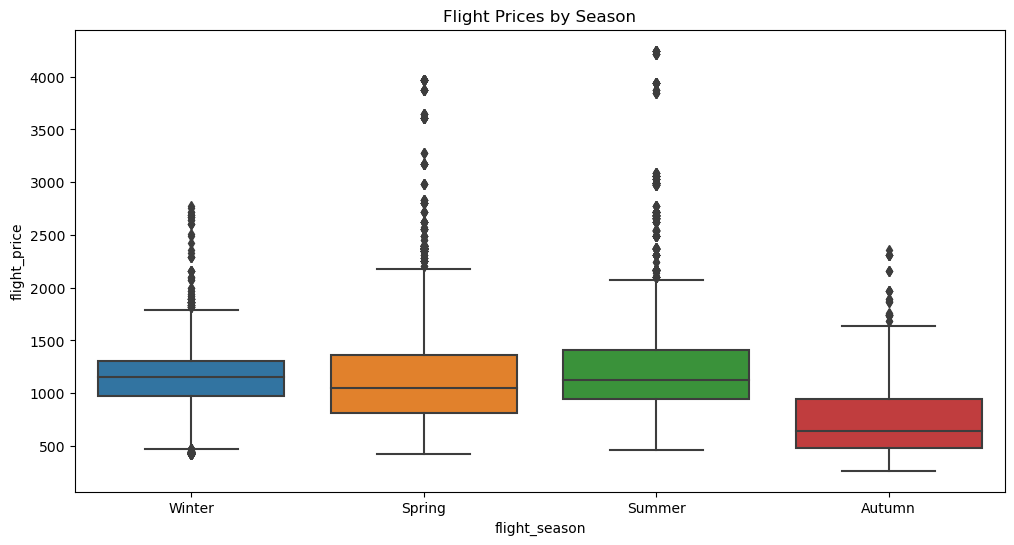

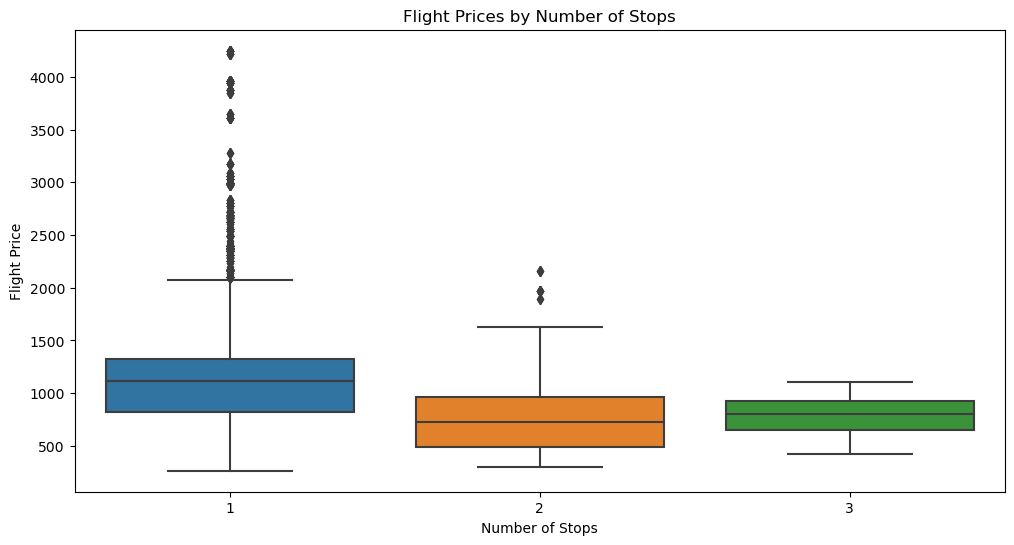

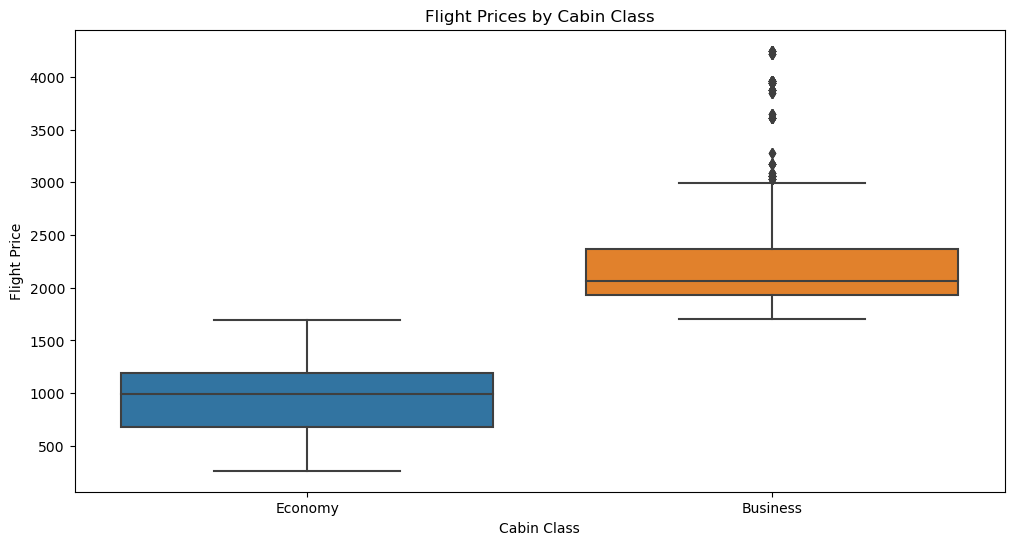

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='flight_season', y='flight_price', data=filtered_df)
plt.title('Flight Prices by Season')
plt.xlabel

plt.figure(figsize=(12, 6))
sns.boxplot(x='out_stops_count', y='flight_price', data=filtered_df)
plt.title('Flight Prices by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Flight Price')
plt.grid(False)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='cabin_class', y='flight_price', data=filtered_df)
plt.title('Flight Prices by Cabin Class')
plt.xlabel('Cabin Class')
plt.ylabel('Flight Price')
plt.grid(False)
plt.show()

# Econom and Business Class Comparision

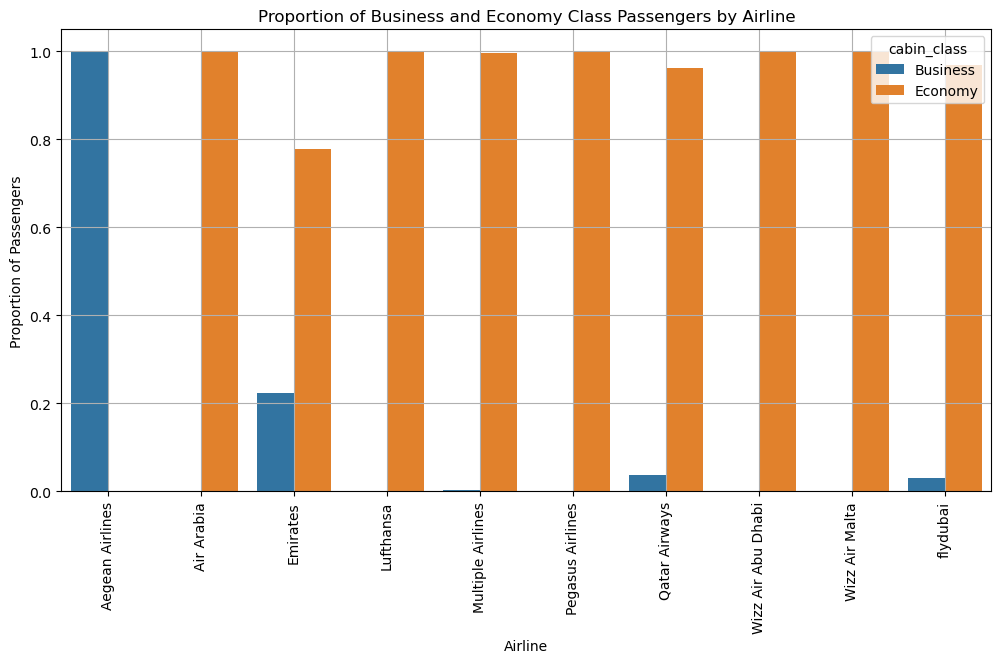

In [ ]:
airline_cabin_distribution = filtered_df.groupby(['out_airline', 'cabin_class']).size().reset_index(name='passenger_count')
airline_cabin_distribution['proportion'] = airline_cabin_distribution.groupby('out_airline')['passenger_count'].transform(lambda x: x / x.sum())

plt.figure(figsize=(12, 6))
sns.barplot(x='out_airline', y='proportion', hue='cabin_class', data=airline_cabin_distribution)
plt.title('Proportion of Business and Economy Class Passengers by Airline')
plt.xlabel('Airline')
plt.ylabel('Proportion of Passengers')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


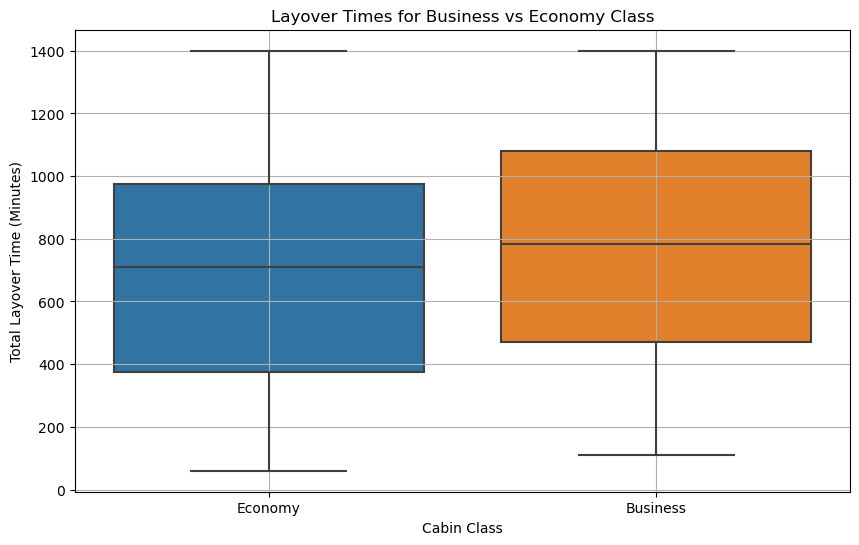

Layover Time Summary Statistics by Cabin Class:
               count        mean         std    min    25%    50%     75%  \
cabin_class                                                                 
Business      1950.0  775.579487  364.796270  110.0  470.0  782.5  1080.0   
Economy      20185.0  700.996037  358.692635   60.0  375.0  710.0   975.0   

                max  
cabin_class          
Business     1400.0  
Economy      1400.0  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Boxplot for Layover Times for Business and Economy Class passengers
plt.figure(figsize=(10, 6))
sns.boxplot(x='cabin_class', y='total_layover_minutes', data=filtered_df)
plt.title('Layover Times for Business vs Economy Class')
plt.xlabel('Cabin Class')
plt.ylabel('Total Layover Time (Minutes)')
plt.grid(True)
plt.show()

# Step 2: Calculate summary statistics for layover times by cabin class
layover_stats = filtered_df.groupby('cabin_class')['total_layover_minutes'].describe()
print("Layover Time Summary Statistics by Cabin Class:")
print(layover_stats)


# Cheapest and Most Expensive Flights by Airline

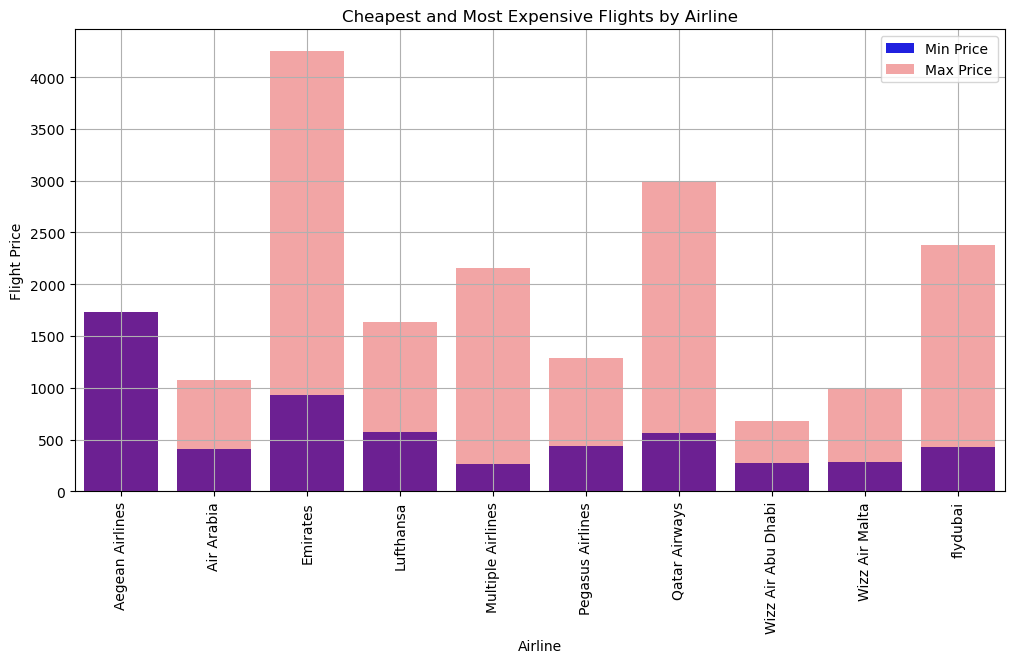

In [ ]:
cheapest_flights = filtered_df.groupby('out_airline')['flight_price'].min().reset_index(name='min_price')
most_expensive_flights = filtered_df.groupby('out_airline')['flight_price'].max().reset_index(name='max_price')

airline_price_comparison = pd.merge(cheapest_flights, most_expensive_flights, on='out_airline')


cheapest_layovers = filtered_df.loc[filtered_df.groupby('out_airline')['flight_price'].idxmin()][['out_airline', 'total_layover_minutes']]

most_expensive_layovers = filtered_df.loc[filtered_df.groupby('out_airline')['flight_price'].idxmax()][['out_airline', 'total_layover_minutes']]
airline_layover_comparison = pd.merge(airline_price_comparison, cheapest_layovers, on='out_airline', suffixes=('_min_price', '_min_layover'))
airline_layover_comparison = pd.merge(airline_layover_comparison, most_expensive_layovers, on='out_airline', suffixes=('_max_price', '_max_layover'))


plt.figure(figsize=(12, 6))
sns.barplot(x='out_airline', y='min_price', data=airline_layover_comparison, color='blue', label='Min Price')
sns.barplot(x='out_airline', y='max_price', data=airline_layover_comparison, color='red', label='Max Price', alpha=0.4)
plt.title('Cheapest and Most Expensive Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Flight Price')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

# Machine Learning and Predicitive models

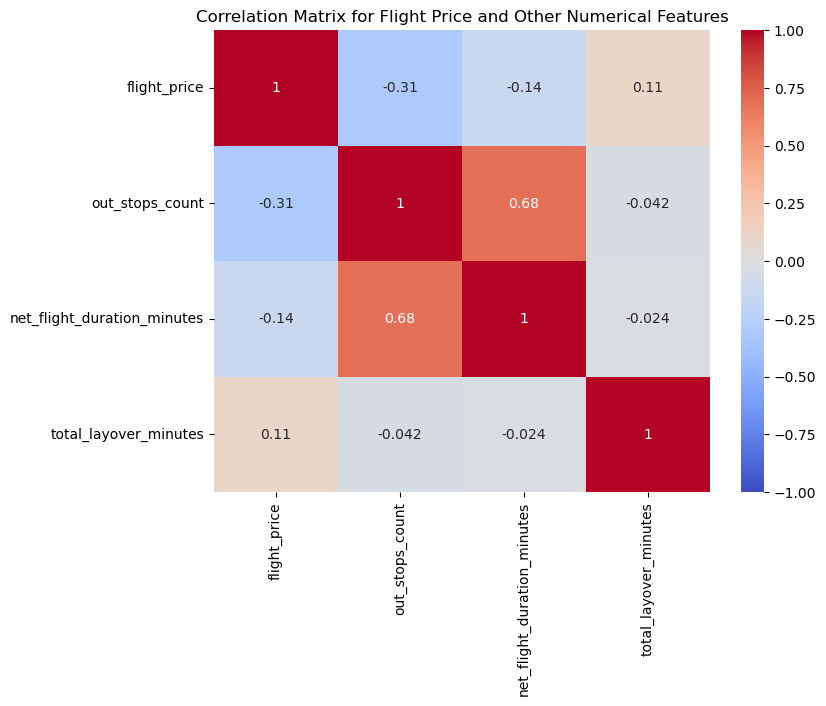

In [ ]:
numerical_columns = ['flight_price', 'out_stops_count', 'net_flight_duration_minutes', 'total_layover_minutes']
correlation_matrix = filtered_df[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Flight Price and Other Numerical Features')
plt.show()

/var/folders/26/y1l96b4102nbg8zz5d6w83p40000gn/T/ipykernel_5858/1122084132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cabin_class_encoded'] = label_encoder.fit_transform(filtered_df['cabin_class'])
/var/folders/26/y1l96b4102nbg8zz5d6w83p40000gn/T/ipykernel_5858/1122084132.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['flight_season_encoded'] = label_encoder.fit_transform(filtered_df['flight_season'])
/var/folders/26/y1l96b4102nbg8zz5d6w83p40000gn/T/ipykernel_5858/1122

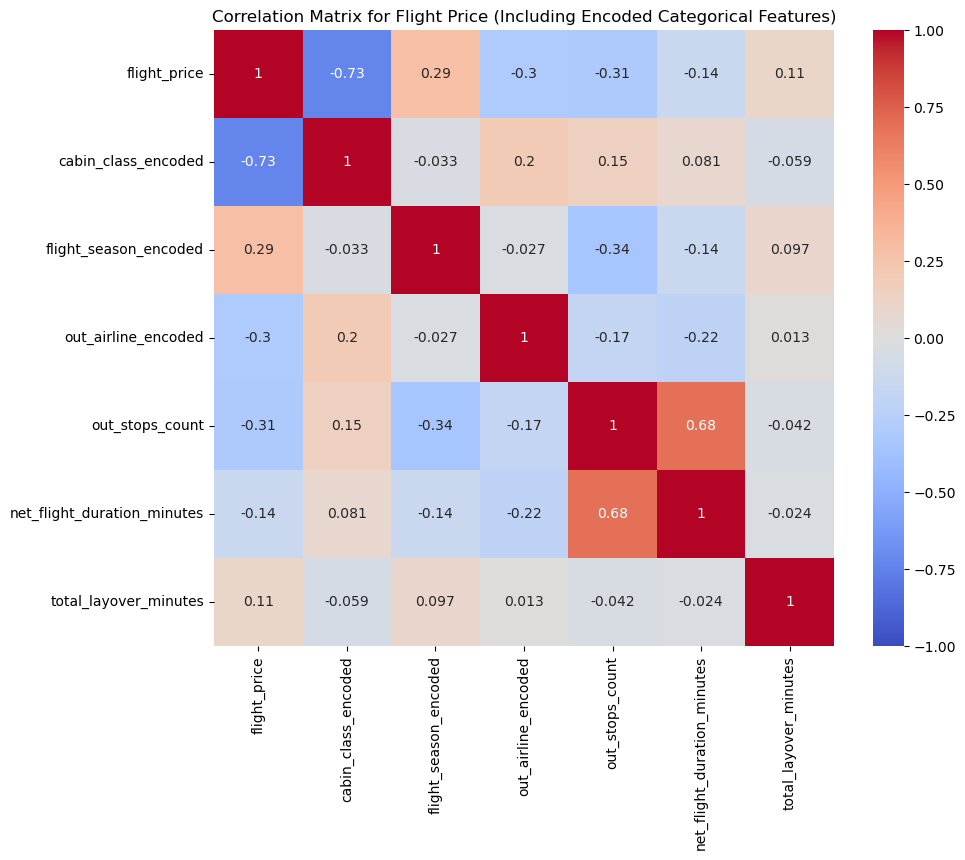

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
filtered_df['cabin_class_encoded'] = label_encoder.fit_transform(filtered_df['cabin_class'])
filtered_df['flight_season_encoded'] = label_encoder.fit_transform(filtered_df['flight_season'])
filtered_df['out_airline_encoded'] = label_encoder.fit_transform(filtered_df['out_airline'])

correlation_with_encoded = filtered_df[['flight_price', 'cabin_class_encoded', 'flight_season_encoded', 'out_airline_encoded', 'out_stops_count', 'net_flight_duration_minutes', 'total_layover_minutes']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_encoded, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Flight Price (Including Encoded Categorical Features)')
plt.show()


In [ ]:
correlation_threshold = 0.1

important_features = correlation_with_encoded['flight_price'].abs()[correlation_with_encoded['flight_price'].abs() > correlation_threshold].index.tolist()
print(f"Important features: {important_features}")


Important features: ['flight_price', 'cabin_class_encoded', 'flight_season_encoded', 'out_airline_encoded', 'out_stops_count', 'net_flight_duration_minutes', 'total_layover_minutes']


# Linear Regression and Regularization

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

df_model = filtered_df[['flight_price', 'cabin_class_encoded', 'flight_season_encoded', 'out_airline_encoded', 'out_stops_count', 'net_flight_duration_minutes', 'total_layover_minutes']]

X = df_model.drop('flight_price', axis=1)
y = df_model['flight_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Feature Importance (Coefficients):")
print(coefficients)


Mean Absolute Error (MAE): 230.89523095281038
R-squared (R²): 0.652974938758965
Feature Importance (Coefficients):
                             Coefficient
cabin_class_encoded         -1156.515398
flight_season_encoded          83.038772
out_airline_encoded           -35.686299
out_stops_count              -208.650190
net_flight_duration_minutes     0.161167
total_layover_minutes           0.059778


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score

df_model = filtered_df[['flight_price', 'cabin_class_encoded', 'flight_season_encoded', 'out_airline_encoded', 'out_stops_count', 'net_flight_duration_minutes', 'total_layover_minutes']]

X = df_model.drop('flight_price', axis=1) 
y = df_model['flight_price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=0.01) 
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)


# Ridge results
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - Mean Absolute Error (MAE): {mae_ridge}")
print(f"Ridge Regression - R-squared (R²): {r2_ridge}")

# Lasso results
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression - Mean Absolute Error (MAE): {mae_lasso}")
print(f"Lasso Regression - R-squared (R²): {r2_lasso}")


coefficients_ridge = pd.DataFrame(ridge_model.coef_, X.columns, columns=['Ridge Coefficient'])
print("Ridge Regression Coefficients:")
print(coefficients_ridge)

# Lasso coefficients
coefficients_lasso = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Lasso Coefficient'])
print("Lasso Regression Coefficients:")
print(coefficients_lasso)


Ridge Regression - Mean Absolute Error (MAE): 230.8672598520868
Ridge Regression - R-squared (R²): 0.6529723961545673
Lasso Regression - Mean Absolute Error (MAE): 230.89104068134466
Lasso Regression - R-squared (R²): 0.652974912214933
Ridge Regression Coefficients:
                             Ridge Coefficient
cabin_class_encoded               -1155.643560
flight_season_encoded                83.036175
out_airline_encoded                 -35.707227
out_stops_count                    -208.650042
net_flight_duration_minutes           0.160891
total_layover_minutes                 0.059818
Lasso Regression Coefficients:
                             Lasso Coefficient
cabin_class_encoded               -1156.397763
flight_season_encoded                83.039154
out_airline_encoded                 -35.687331
out_stops_count                    -208.578840
net_flight_duration_minutes           0.160935
total_layover_minutes                 0.059786


# Predict Flight Duration and Ticket Price

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
df

,out_airline,departure,out_arrival_airport,out_duration (min),departure_time,out_arrival_time (min),return_airline,ret_departure,return_arrival_airport,return_duration (min),...,return_stop3_layover (min),flight_month,flight_week_duration,cabin_class,flight_season,flight_route,out_stops_count,return_stops_count,total_layover_minutes,net_flight_duration_minutes
0,flydubai,DMM,EVN,475,8:25 pm,5:20 am,flydubai,EVN,DMM,360,...,0,Jan,One Week,Economy,Winter,DMM EVN,1,1,180,295
1,flydubai,DMM,EVN,475,8:25 pm,5:20 am,flydubai,EVN,DMM,1230,...,0,Jan,One Week,Economy,Winter,DMM EVN,1,1,180,295
2,flydubai,DMM,EVN,490,12:20 pm,9:30 pm,flydubai,EVN,DMM,360,...,0,Jan,One Week,Economy,Winter,DMM EVN,1,1,200,290
3,flydubai,DMM,EVN,475,8:25 pm,5:20 am,flydubai,EVN,DMM,470,...,0,Jan,One Week,Economy,Winter,DMM EVN,1,1,180,295
4,flydubai,DMM,EVN,490,12:20 pm,9:30 pm,flydubai,EVN,DMM,470,...,0,Jan,One Week,Economy,Winter,DMM EVN,1,1,200,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23231,Emirates,EVN,RUH,630,10:30 pm,8:00 am,Emirates,RUH,EVN,795,...,0,Dec,One Month,Business,Winter,EVN RUH,1,1,320,310
23232,flydubai,EVN,MED,2200,12:35 pm,12:15 am,flydubai,MED,EVN,2000,...,0,Dec,One Month,Economy,Winter,EVN MED,1,1,1825,375
23233,flydubai,EVN,MED,2575,6:20 am,12:15 am,flydubai,MED,EVN,1625,...,0,Dec,One Month,Economy,Winter,EVN MED,1,1,2200,375
23234,Qatar Airways,EVN,MED,985,2:45 am,6:10 pm,Qatar Airways,MED,EVN,1670,...,0,Dec,One Month,Business,Winter,EVN MED,1,1,660,325


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters for XGBoost (Flight Duration): {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}
Best XGBoost Flight Duration MSE: 127982.12081189339
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters for XGBoost (Flight Price): {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Best XGBoost Flight Price MSE: 30432.814307927078


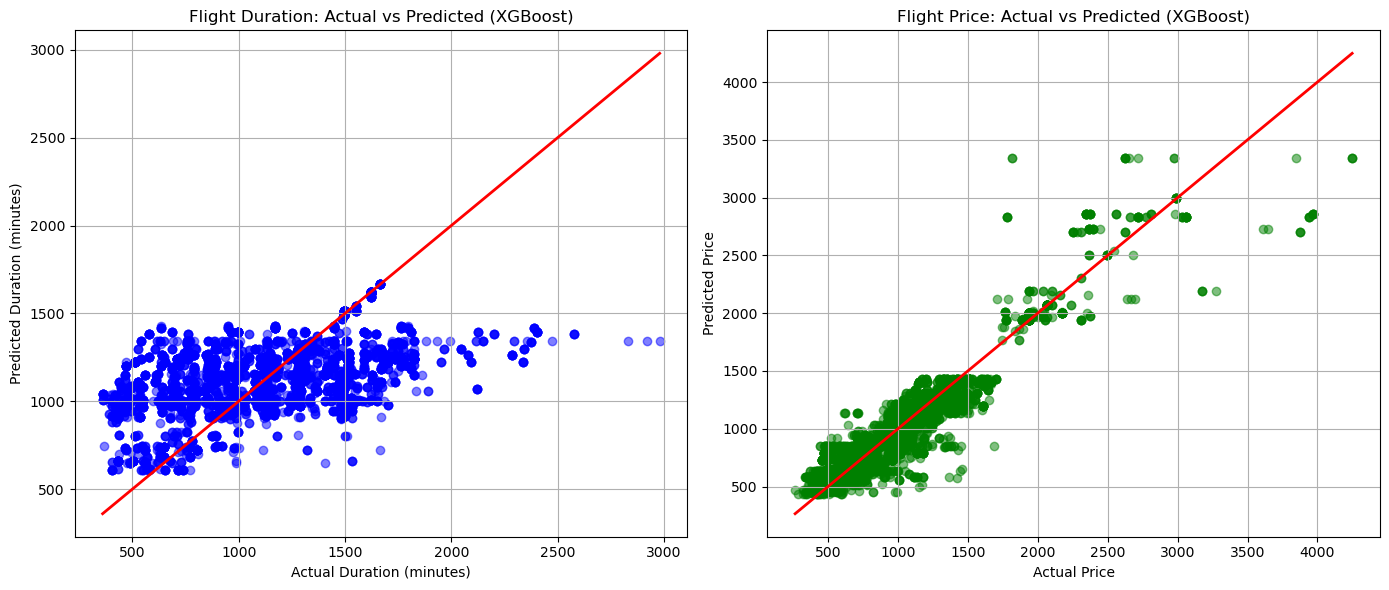

In [118]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

relevant_columns = ['out_airline', 'departure', 'out_arrival_airport', 'out_duration (min)', 
                    'flight_price', 'cabin_class', 'flight_season', 'out_stops_count']

flights_cleaned = df[relevant_columns].dropna()

categorical_columns = ['out_airline', 'departure', 'out_arrival_airport', 'cabin_class', 'flight_season']

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    flights_cleaned[col] = label_encoders[col].fit_transform(flights_cleaned[col])

X = flights_cleaned.drop(columns=['out_duration (min)', 'flight_price'])
y_duration = flights_cleaned['out_duration (min)']
y_price = flights_cleaned['flight_price']

X_train, X_test, y_duration_train, y_duration_test = train_test_split(X, y_duration, test_size=0.2, random_state=42)
X_train_price, X_test_price, y_price_train, y_price_test = train_test_split(X, y_price, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_price = scaler.fit_transform(X_train_price)
X_test_price = scaler.transform(X_test_price)

xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5]
}

grid_search_duration = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, 
                                    scoring='neg_mean_squared_error', cv=3, verbose=1)

grid_search_duration.fit(X_train, y_duration_train)

best_params_duration = grid_search_duration.best_params_
print(f"Best parameters for XGBoost (Flight Duration): {best_params_duration}")

best_duration_model = xgb.XGBRegressor(**best_params_duration, objective='reg:squarederror', random_state=42)
best_duration_model.fit(X_train, y_duration_train)

y_duration_pred_best = best_duration_model.predict(X_test)

best_duration_mse = mean_squared_error(y_duration_test, y_duration_pred_best)
print(f"Best XGBoost Flight Duration MSE: {best_duration_mse}")

grid_search_price = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, 
                                 scoring='neg_mean_squared_error', cv=3, verbose=1)

grid_search_price.fit(X_train_price, y_price_train)

best_params_price = grid_search_price.best_params_
print(f"Best parameters for XGBoost (Flight Price): {best_params_price}")

best_price_model = xgb.XGBRegressor(**best_params_price, objective='reg:squarederror', random_state=42)
best_price_model.fit(X_train_price, y_price_train)

y_price_pred_best = best_price_model.predict(X_test_price)

# Evaluate the model
best_price_mse = mean_squared_error(y_price_test, y_price_pred_best)
print(f"Best XGBoost Flight Price MSE: {best_price_mse}")


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_duration_test, y_duration_pred_best, alpha=0.5, color='blue')
plt.plot([y_duration_test.min(), y_duration_test.max()], [y_duration_test.min(), y_duration_test.max()], color='red', lw=2)
plt.title('Flight Duration: Actual vs Predicted (XGBoost)')
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_price_test, y_price_pred_best, alpha=0.5, color='green')
plt.plot([y_price_test.min(), y_price_test.max()], [y_price_test.min(), y_price_test.max()], color='red', lw=2)
plt.title('Flight Price: Actual vs Predicted (XGBoost)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

plt.tight_layout()
plt.show()


In [124]:
unique_airports = df['departure'].unique()
print("Unique Departure Airports:", unique_airports)
saudi_airports = ['DMM', 'RUH', 'JED', 'MED']

saudi_flights = df[df['departure'].isin(saudi_airports)]
optimal_airports = saudi_flights.groupby('departure').agg({
    'flight_price': 'mean',
    'out_stops_count': 'mean'
}).reset_index()

optimal_airports.columns = ['Departure Airport', 'Average Price', 'Average Stops']

optimal_airports_sorted = optimal_airports.sort_values(by=['Average Price', 'Average Stops'])

print("Optimal Departure Airports (sorted by price and stops):")
print(optimal_airports_sorted)


Unique Departure Airports: ['DMM' 'RUH' 'JED' 'EVN']
Optimal Departure Airports (sorted by price and stops):
  Departure Airport  Average Price  Average Stops
0               DMM     906.352665       1.314072
2               RUH     918.530636       1.325053
1               JED    1130.490895       1.124391


Flight Price Prediction MSE: 36582.275196224065
Number of Stops Prediction MSE: 0.006079965747926463


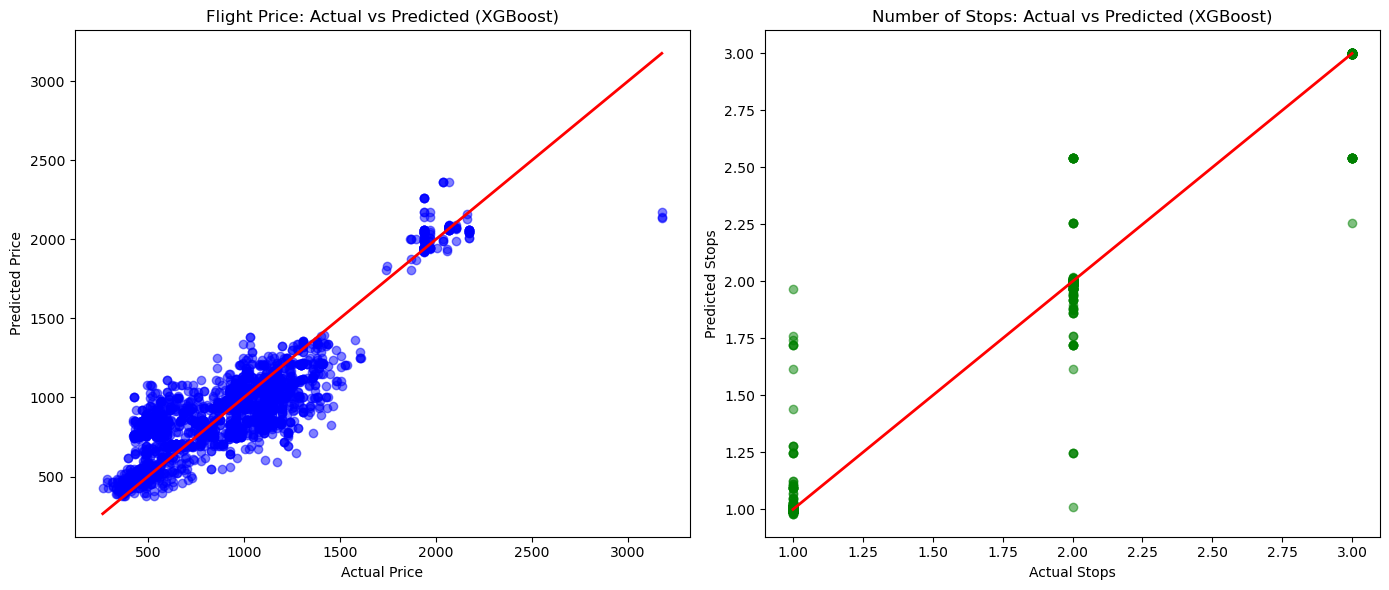

In [125]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

# Step 1: Prepare the data for modeling
# Select relevant features for prediction (including categorical features)
features = ['departure', 'out_arrival_airport', 'cabin_class', 'flight_season', 'out_duration (min)']
target_price = 'flight_price'
target_stops = 'out_stops_count'

# Filter the data for Saudi Arabian airports
saudi_flights = df[df['departure'].isin(saudi_airports)]

# Drop rows with missing values in relevant columns
saudi_flights_cleaned = saudi_flights[features + [target_price, target_stops]].dropna()

# Encode categorical features
categorical_columns = ['departure', 'out_arrival_airport', 'cabin_class', 'flight_season']
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    saudi_flights_cleaned[col] = label_encoders[col].fit_transform(saudi_flights_cleaned[col])

# Step 2: Split the data into features (X) and targets (y)
X = saudi_flights_cleaned[features]
y_price = saudi_flights_cleaned[target_price]
y_stops = saudi_flights_cleaned[target_stops]

# Split the data into training and testing sets
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X, y_price, test_size=0.2, random_state=42)
X_train_stops, X_test_stops, y_train_stops, y_test_stops = train_test_split(X, y_stops, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_price = scaler.fit_transform(X_train_price)
X_test_price = scaler.transform(X_test_price)
X_train_stops = scaler.fit_transform(X_train_stops)
X_test_stops = scaler.transform(X_test_stops)

# Step 3: Train the XGBoost models

# Model to predict flight price
xgb_price_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_price_model.fit(X_train_price, y_train_price)

# Model to predict number of stops
xgb_stops_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_stops_model.fit(X_train_stops, y_train_stops)

# Step 4: Make predictions
y_pred_price = xgb_price_model.predict(X_test_price)
y_pred_stops = xgb_stops_model.predict(X_test_stops)

# Step 5: Evaluate the models
price_mse = mean_squared_error(y_test_price, y_pred_price)
stops_mse = mean_squared_error(y_test_stops, y_pred_stops)

print(f"Flight Price Prediction MSE: {price_mse}")
print(f"Number of Stops Prediction MSE: {stops_mse}")

# Step 6: Visualization of Predictions vs Actuals

import matplotlib.pyplot as plt

# Plot for flight price prediction
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_price, y_pred_price, color='blue', alpha=0.5)
plt.plot([y_test_price.min(), y_test_price.max()], [y_test_price.min(), y_test_price.max()], color='red', lw=2)
plt.title('Flight Price: Actual vs Predicted (XGBoost)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Plot for stops prediction
plt.subplot(1, 2, 2)
plt.scatter(y_test_stops, y_pred_stops, color='green', alpha=0.5)
plt.plot([y_test_stops.min(), y_test_stops.max()], [y_test_stops.min(), y_test_stops.max()], color='red', lw=2)
plt.title('Number of Stops: Actual vs Predicted (XGBoost)')
plt.xlabel('Actual Stops')
plt.ylabel('Predicted Stops')

plt.tight_layout()
plt.show()
